## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Насыбуллин А. А.|
|---------|--------|
| Группа  | М8О-107М-20 VR/AR & ИИ|

Для скачивания датасетов можно Использовать `wget` или `curl`, либо скачать вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

### Подлючение модулей и библиотек

In [1]:
import pickle
import numpy as np
import pandas as pd
import os
from time import time

Получение модуля `mlp.py`, в котором содержатся неободимые для работы классы нейронной сети

In [2]:
!wget -P . 'https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/NotebooksColab/MLP/mlp.py'

--2021-06-15 11:05:21--  https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/NotebooksColab/MLP/mlp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11112 (11K) [text/plain]
Saving to: ‘./mlp.py’

mlp.py              100%[===================>]  10.85K  --.-KB/s    in 0s      

2021-06-15 11:05:21 (89.0 MB/s) - ‘./mlp.py’ saved [11112/11112]



Подключение модуля `mlp` для дальнейшего использования

In [3]:
import mlp

Настройка Pandas

In [4]:
# установка максимального количества столбцов и строк для вывода
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 25)

# установка количества знаков после запятой
pd.set_option("precision", 2)

## Converting to Grayscale
Из статьи [Color Image Into Grayscale Using Python Image Processing Libraries](https://www.prasannakumarr.in/journal/color-to-grayscale-python-image-processing)

#### Method 1: Averaging the R,G,B values.(non-linear)


In [5]:
def img_convert_avg_rgb(x_train_r, x_test_r):
  x_train = np.array(list(map(lambda x: np.mean(x, axis=1), x_train_r)))
  x_test = np.array(list(map(lambda x: np.mean(x, axis=1), x_test_r)))
  return x_train, x_test

#### Method 2: LUMA-REC-601(non-linear)


In [6]:
def luma_rec_601(data):
  return list(map(lambda x: x[0]*0.299 + x[1]*0.587 + x[2]*0.114, data))


def img_convert_luma_rec_601(x_train_r, x_test_r):
  x_train = np.array(list(map(lambda x: luma_rec_601(x), x_train_r)))
  x_test = np.array(list(map(lambda x: luma_rec_601(x), x_test_r)))
  return x_train, x_test

#### Method 3 - LUMA-REC.709(non-linear)

In [7]:
def luma_rec_709(data):
  return list(map(lambda x: x[0] * 0.2125 + x[1] * 0.7154 + x[2] * 0.0721, data))

def img_convert_luma_rec_709(x_train_r, x_test_r):
  x_train = np.array(list(map(lambda x: luma_rec_709(x), x_train_r)))
  x_test = np.array(list(map(lambda x: luma_rec_709(x), x_test_r)))
  return x_train, x_test

## CIFAR-10

Настройка путей для сохранения файлов

In [8]:
img_dir = os.path.join(os.getcwd(), 'img_cifar-10')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

### Загрузка и просмотр данных CIFAR-10

In [9]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [10]:
print(f'Размерность матрицы данных x_train: {x_train.shape}')
print(f'Размерность матрицы данных x_test: {x_test.shape}')
print(f'Размерность матрицы данных y_train: {y_train.shape}')
print(f'Размерность матрицы данных y_test: {y_test.shape}')

print(f'Количество признаков (пикселей): {x_train.shape[1]}')
print(f'Количество объектов (картинок): {x_train.shape[0]}')

# необходимо узнать количество классов на выходе
print(f'Количество разных ответов (классов): {len(np.unique(y_train))}')

Размерность матрицы данных x_train: (50000, 32, 32, 3)
Размерность матрицы данных x_test: (10000, 32, 32, 3)
Размерность матрицы данных y_train: (50000, 1)
Размерность матрицы данных y_test: (10000, 1)
Количество признаков (пикселей): 32
Количество объектов (картинок): 50000
Количество разных ответов (классов): 10


In [11]:
x_train = x_train.astype(float)
x_train = x_train / 255

x_test = x_test.astype(float)
x_test = x_test / 255

In [12]:
x_train_r = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2], x_train.shape[3])
x_test_r = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2], x_test.shape[3])

y_train = y_train.flatten()
y_test = y_test.flatten()

In [13]:
loss = mlp.LossFunction('cross-entropy')
metrics = mlp.NeuralNetworkMetrics()
n_epoch = 30

### Применение нейронных сетей (с различными гиперпараметрами)для изображений, конвертированых в монохром методом усреднения значений каналов

In [14]:
x_train, x_test = img_convert_avg_rgb(x_train_r, x_test_r)

Initial train loss=2.409, accuracy=0.097
Initial valid loss=2.411, accuracy=0.096
Final train loss=1.979, accuracy=0.311
Final valid loss=2.023, accuracy=0.293


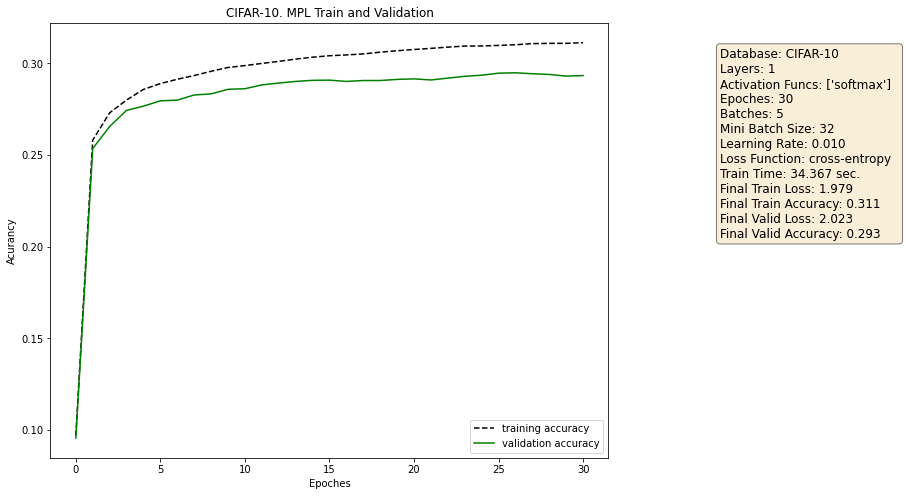

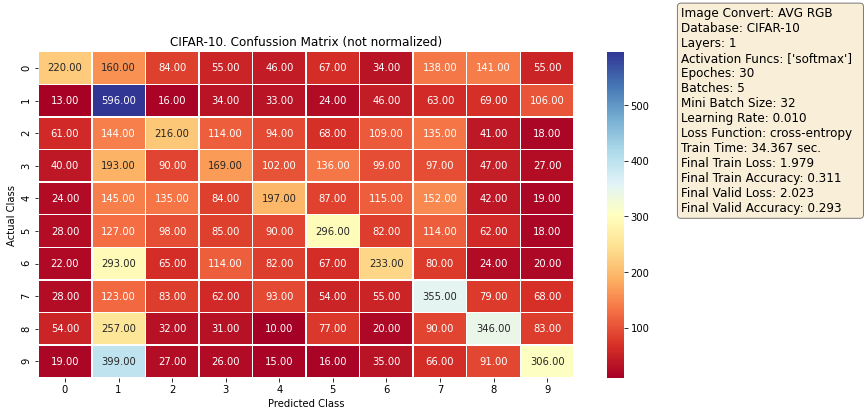

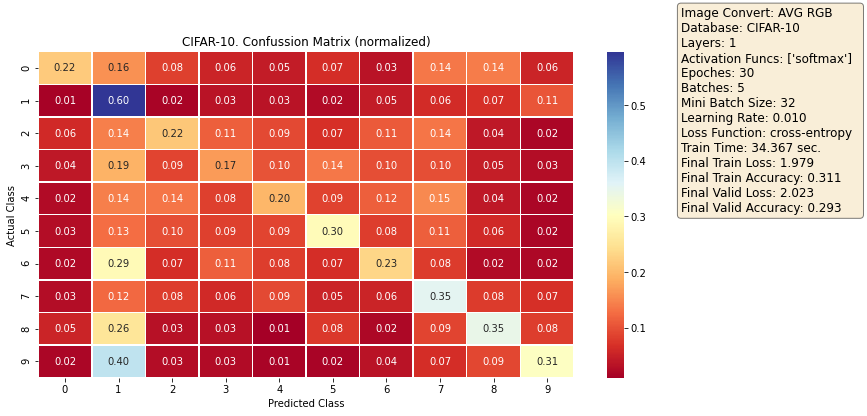

Image Convert: AVG RGB
Database: CIFAR-10  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 34.367 sec.  
Final Train Loss: 1.979  
Final Train Accuracy: 0.311  
Final Valid Loss: 2.023  
Final Valid Accuracy: 0.293


In [15]:
layer1 = mlp.NeuralNetworkLayer(1024, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'rgb_avg'), img_format='. 1 layer.png')
description = f'Image Convert: AVG RGB\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'rgb_avg'), '. 1 layer.png', description)
print(description)

Initial train loss=2.328, accuracy=0.113
Initial valid loss=2.326, accuracy=0.114
Final train loss=1.638, accuracy=0.417
Final valid loss=1.714, accuracy=0.387


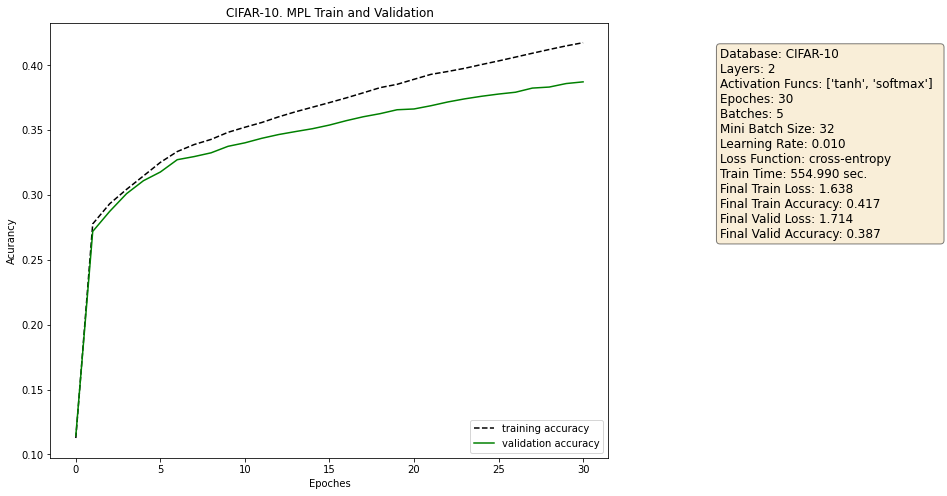

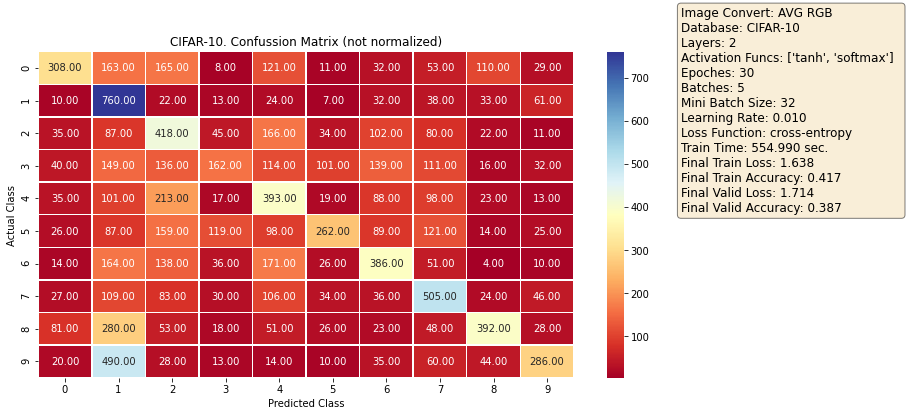

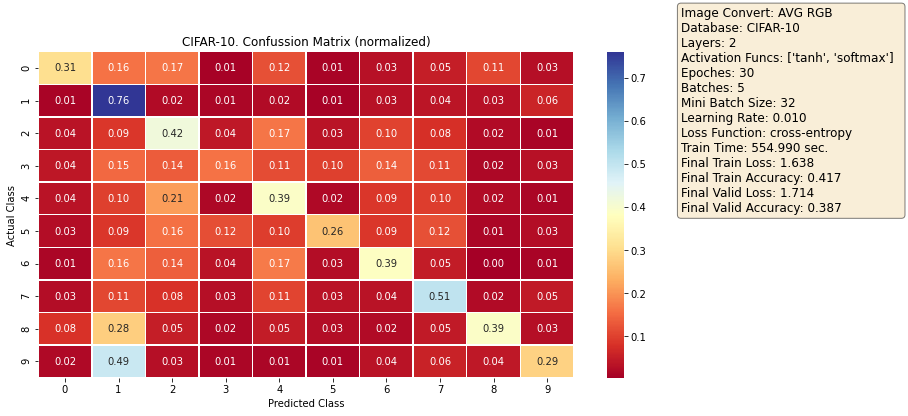

Image Convert: AVG RGB
Database: CIFAR-10  
Layers: 2  
Activation Funcs: ['tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 554.990 sec.  
Final Train Loss: 1.638  
Final Train Accuracy: 0.417  
Final Valid Loss: 1.714  
Final Valid Accuracy: 0.387


In [16]:
layer1 = mlp.NeuralNetworkLayer(1024, 512, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(512, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'rgb_avg'), img_format='. 2 layers.png')
description = f'Image Convert: AVG RGB\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'rgb_avg'), '. 2 layers.png', description)
print(description)

Initial train loss=2.491, accuracy=0.100
Initial valid loss=2.491, accuracy=0.101
Final train loss=1.709, accuracy=0.397
Final valid loss=1.743, accuracy=0.382


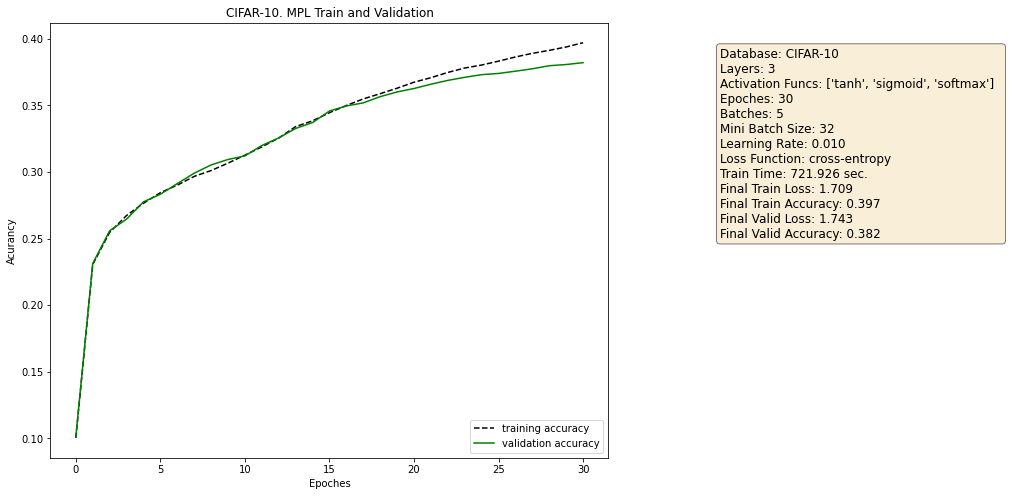

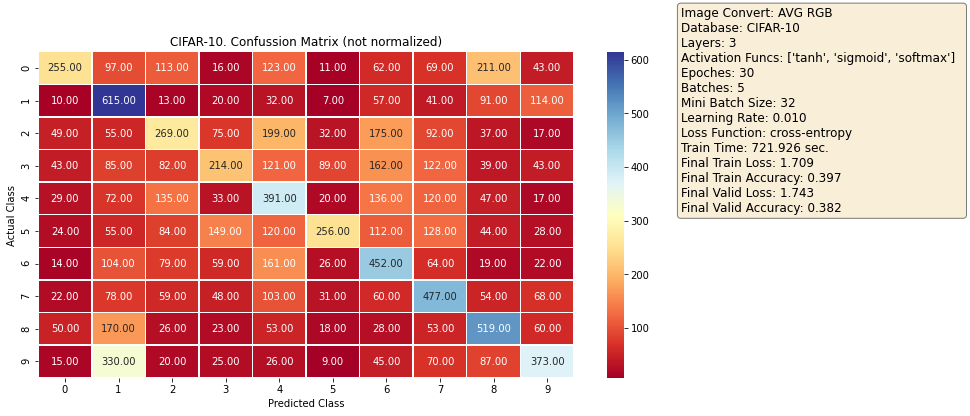

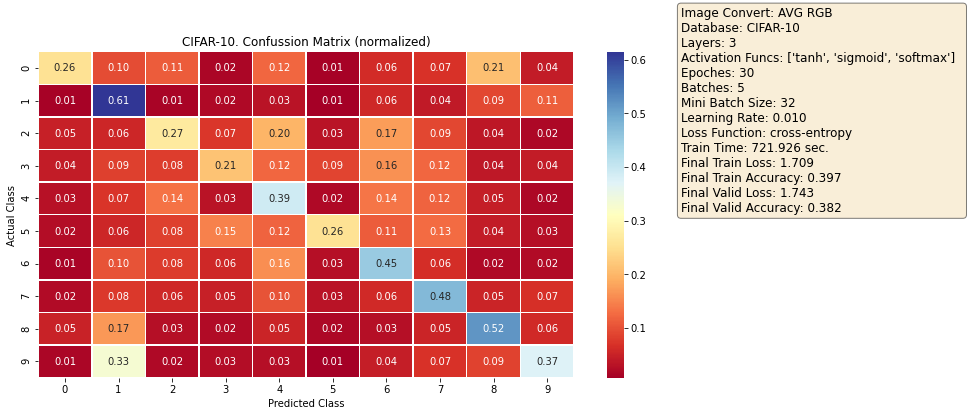

Image Convert: AVG RGB
Database: CIFAR-10  
Layers: 3  
Activation Funcs: ['tanh', 'sigmoid', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 721.926 sec.  
Final Train Loss: 1.709  
Final Train Accuracy: 0.397  
Final Valid Loss: 1.743  
Final Valid Accuracy: 0.382


In [17]:
layer1 = mlp.NeuralNetworkLayer(1024, 512, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(512, 256, activation_func=mlp.ActivationFunction('sigmoid'))
layer3 = mlp.NeuralNetworkLayer(256, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'rgb_avg'), img_format='. 3 layers.png')
description = f'Image Convert: AVG RGB\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'rgb_avg'), '. 3 layers.png', description)
print(description)

### Применение нейронных сетей (с различными гиперпараметрами)для изображений, конвертированых в монохром LUMA-REC-601

In [18]:
x_train, x_test = img_convert_luma_rec_601(x_train_r, x_test_r)

Initial train loss=2.376, accuracy=0.090
Initial valid loss=2.377, accuracy=0.086
Final train loss=1.992, accuracy=0.307
Final valid loss=2.040, accuracy=0.287


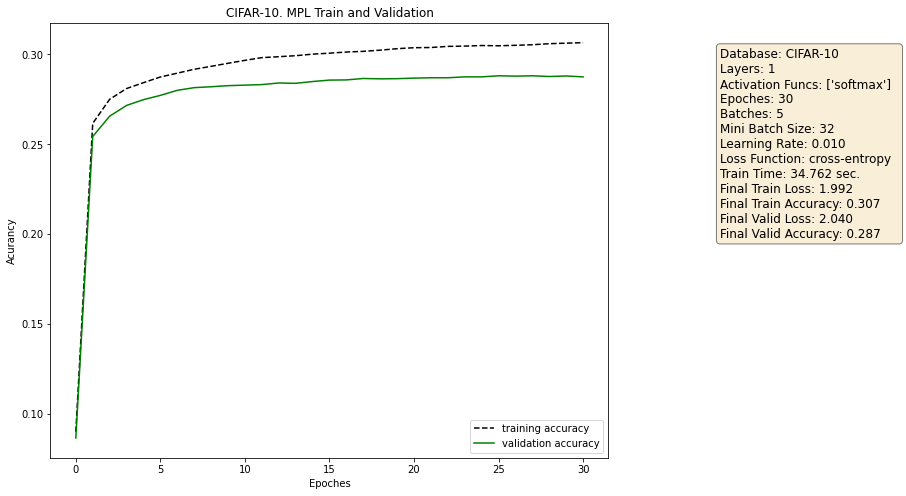

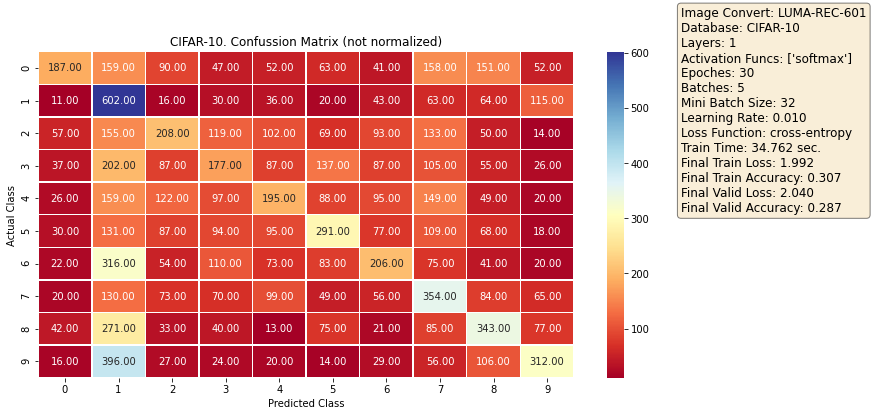

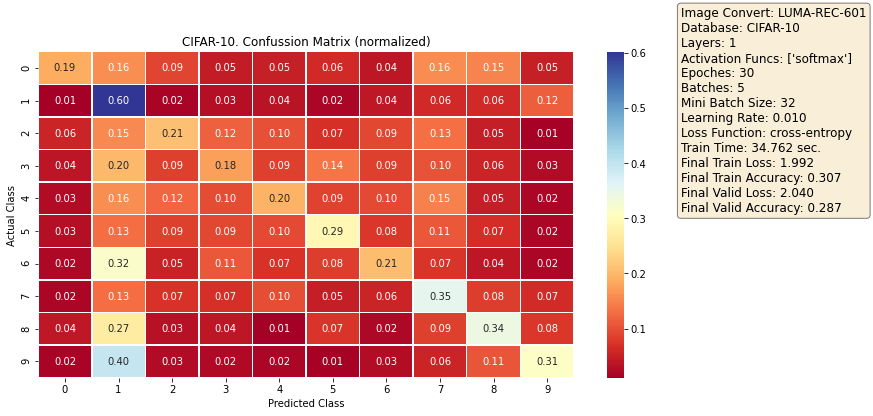

Image Convert: LUMA-REC-601
Database: CIFAR-10  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 34.762 sec.  
Final Train Loss: 1.992  
Final Train Accuracy: 0.307  
Final Valid Loss: 2.040  
Final Valid Accuracy: 0.287


In [19]:
layer1 = mlp.NeuralNetworkLayer(1024, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'LUMA-REC-601'), img_format='. 1 layer.png')
description = f'Image Convert: LUMA-REC-601\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'LUMA-REC-601'), '. 1 layer.png', description)
print(description)

Initial train loss=2.387, accuracy=0.097
Initial valid loss=2.388, accuracy=0.099
Final train loss=1.635, accuracy=0.420
Final valid loss=1.717, accuracy=0.387


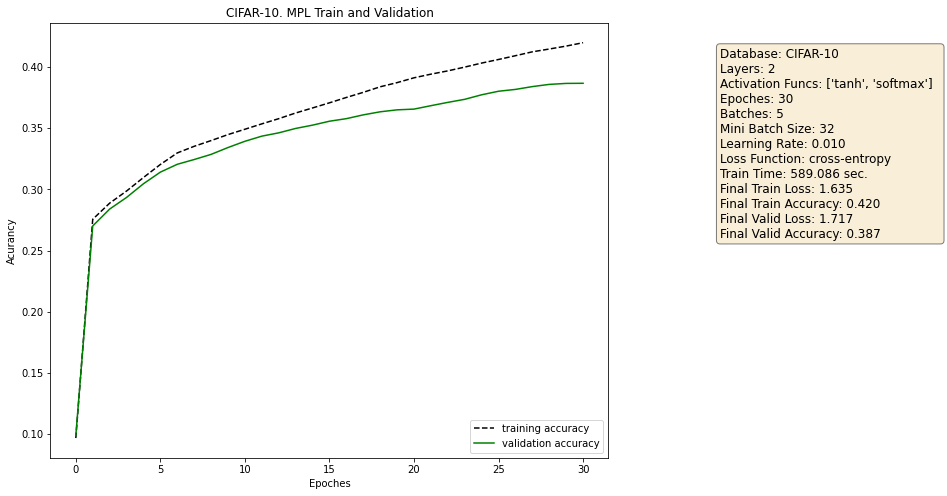

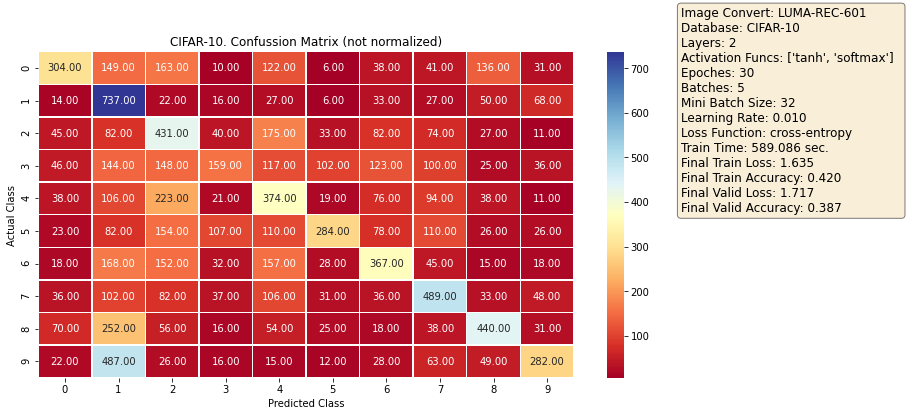

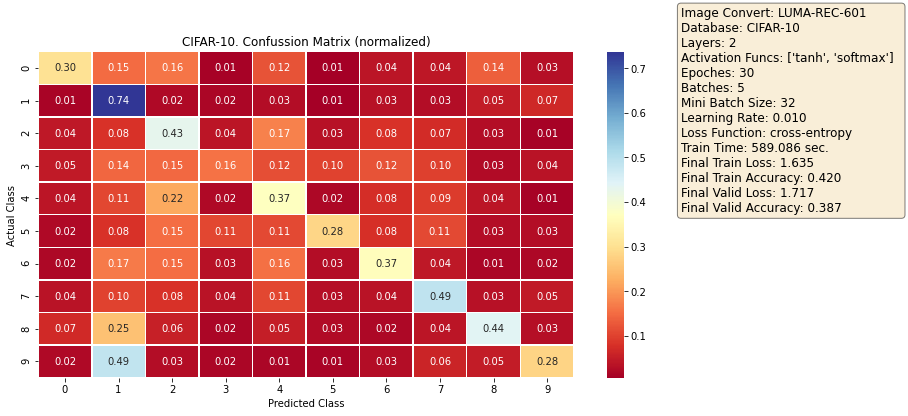

Image Convert: LUMA-REC-601
Database: CIFAR-10  
Layers: 2  
Activation Funcs: ['tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 589.086 sec.  
Final Train Loss: 1.635  
Final Train Accuracy: 0.420  
Final Valid Loss: 1.717  
Final Valid Accuracy: 0.387


In [20]:
layer1 = mlp.NeuralNetworkLayer(1024, 512, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(512, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss, 
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'LUMA-REC-601'), img_format='_2.png')
description = f'Image Convert: LUMA-REC-601\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'LUMA-REC-601'), ' 2.png', description)
print(description)

Initial train loss=2.519, accuracy=0.101
Initial valid loss=2.520, accuracy=0.100
Final train loss=1.721, accuracy=0.392
Final valid loss=1.761, accuracy=0.376


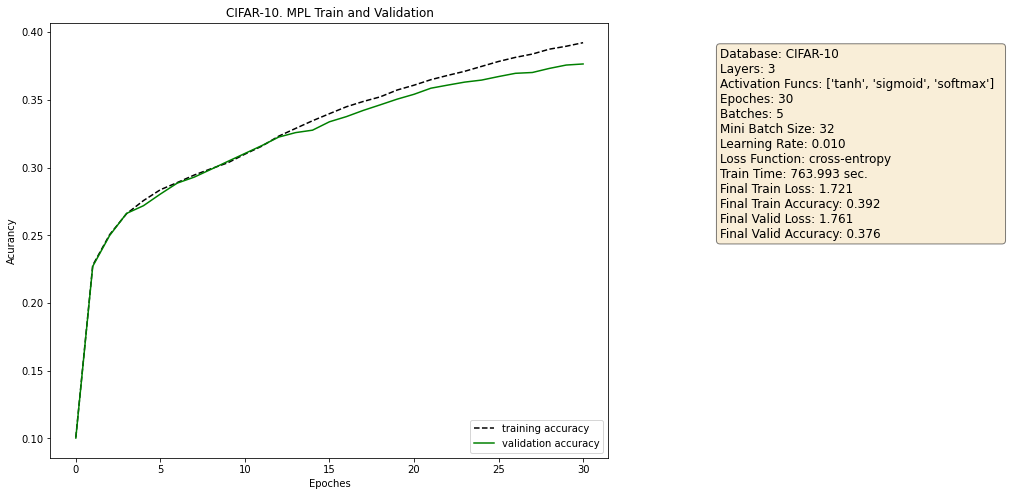

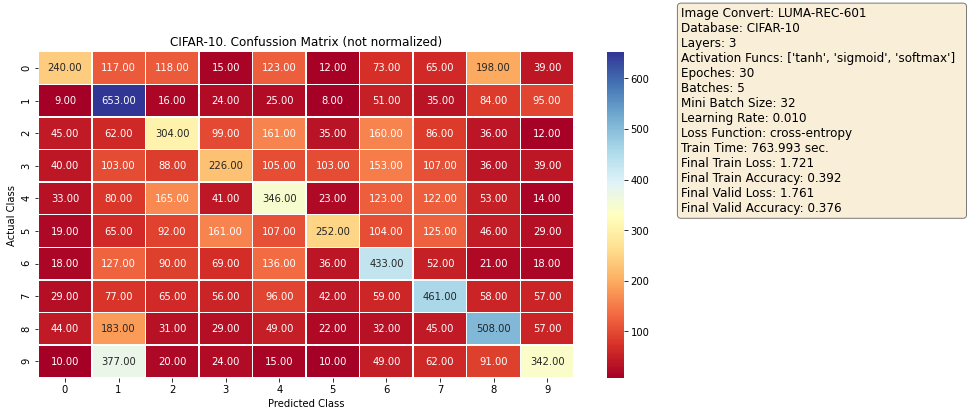

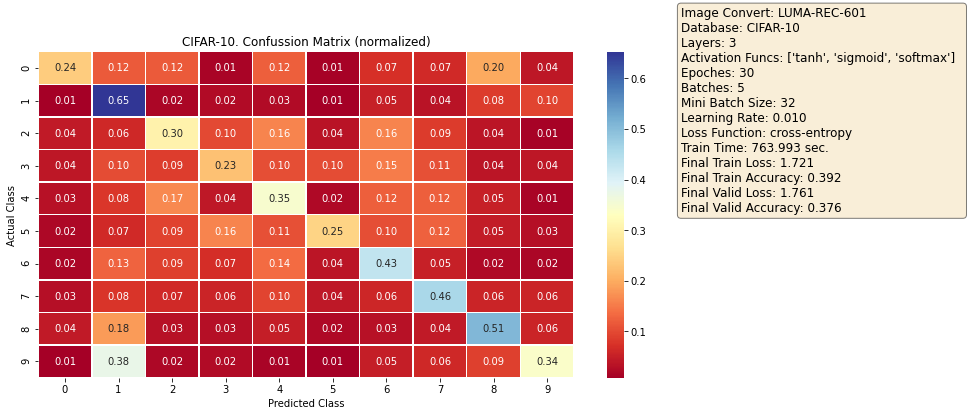

Image Convert: LUMA-REC-601
Database: CIFAR-10  
Layers: 3  
Activation Funcs: ['tanh', 'sigmoid', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 763.993 sec.  
Final Train Loss: 1.721  
Final Train Accuracy: 0.392  
Final Valid Loss: 1.761  
Final Valid Accuracy: 0.376


In [21]:
layer1 = mlp.NeuralNetworkLayer(1024, 512, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(512, 256, activation_func=mlp.ActivationFunction('sigmoid'))
layer3 = mlp.NeuralNetworkLayer(256, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'LUMA-REC-601'), img_format='. 3 layers.png')
description = f'Image Convert: LUMA-REC-601\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'LUMA-REC-601'), '. 3 layers.png', description)
print(description)

### Применение нейронных сетей (с различными гиперпараметрами)для изображений, конвертированых в монохром  LUMA-REC-709

In [22]:
x_train, x_test = img_convert_luma_rec_709(x_train_r, x_test_r)

Initial train loss=2.405, accuracy=0.083
Initial valid loss=2.404, accuracy=0.081
Final train loss=1.991, accuracy=0.307
Final valid loss=2.038, accuracy=0.285


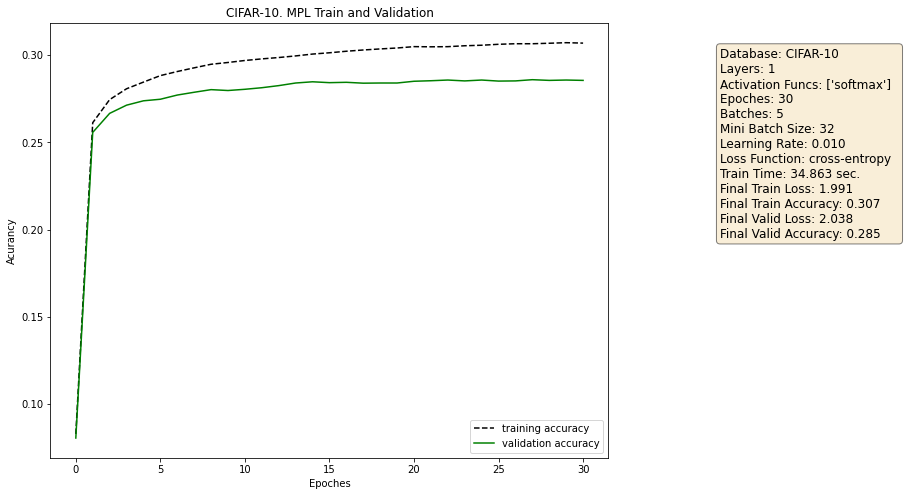

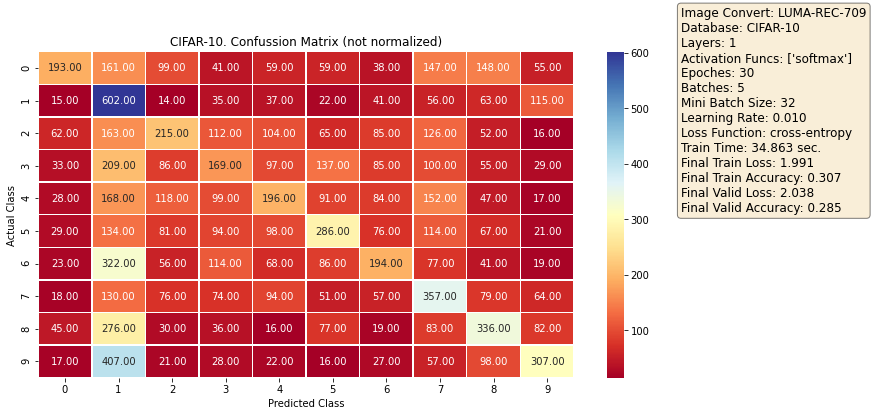

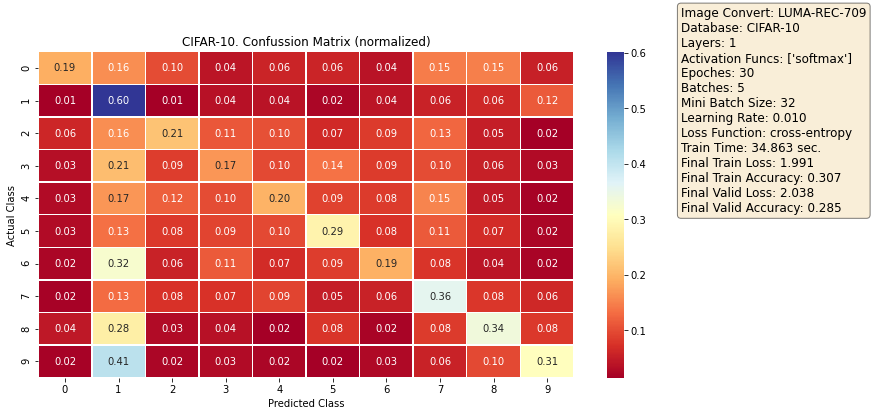

Image Convert: LUMA-REC-709
Database: CIFAR-10  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 34.863 sec.  
Final Train Loss: 1.991  
Final Train Accuracy: 0.307  
Final Valid Loss: 2.038  
Final Valid Accuracy: 0.285


In [23]:
layer1 = mlp.NeuralNetworkLayer(1024, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'LUMA-REC-709'), img_format='. 1 layer.png')
description = f'Image Convert: LUMA-REC-709\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'LUMA-REC-709'), '. 1 layer.png', description)
print(description)

Initial train loss=2.361, accuracy=0.080
Initial valid loss=2.358, accuracy=0.085
Final train loss=1.630, accuracy=0.421
Final valid loss=1.714, accuracy=0.390


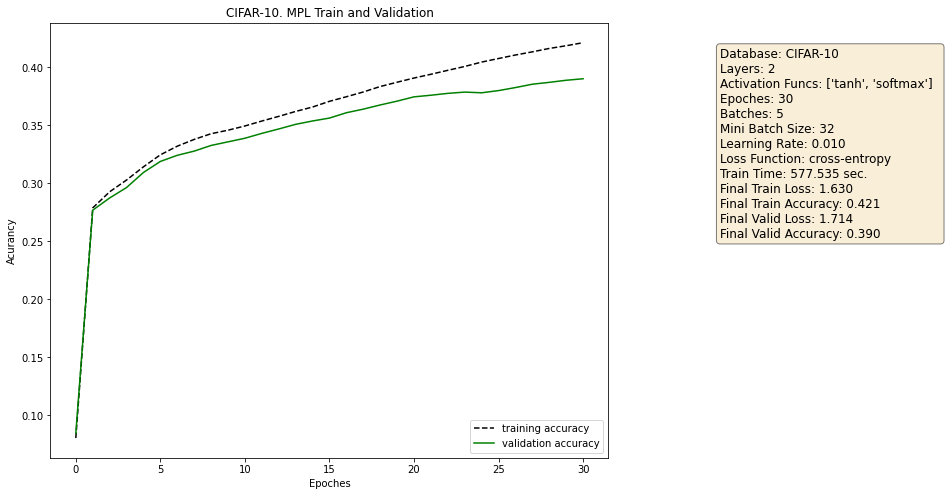

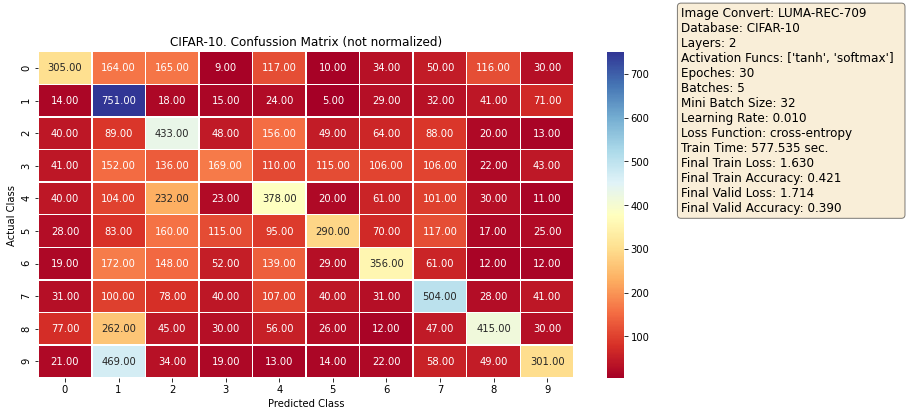

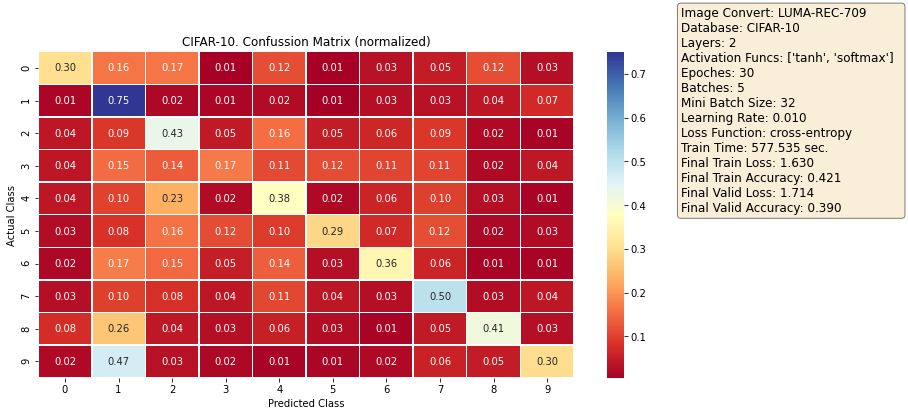

Image Convert: LUMA-REC-709
Database: CIFAR-10  
Layers: 2  
Activation Funcs: ['tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 577.535 sec.  
Final Train Loss: 1.630  
Final Train Accuracy: 0.421  
Final Valid Loss: 1.714  
Final Valid Accuracy: 0.390


In [24]:
layer1 = mlp.NeuralNetworkLayer(1024, 512, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(512, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'LUMA-REC-709'), img_format='. 2 layers.png')
description = f'Image Convert: LUMA-REC-709\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'LUMA-REC-709'), '. 2 layers.png', description)
print(description)

Initial train loss=2.430, accuracy=0.100
Initial valid loss=2.430, accuracy=0.100
Final train loss=1.717, accuracy=0.395
Final valid loss=1.756, accuracy=0.376


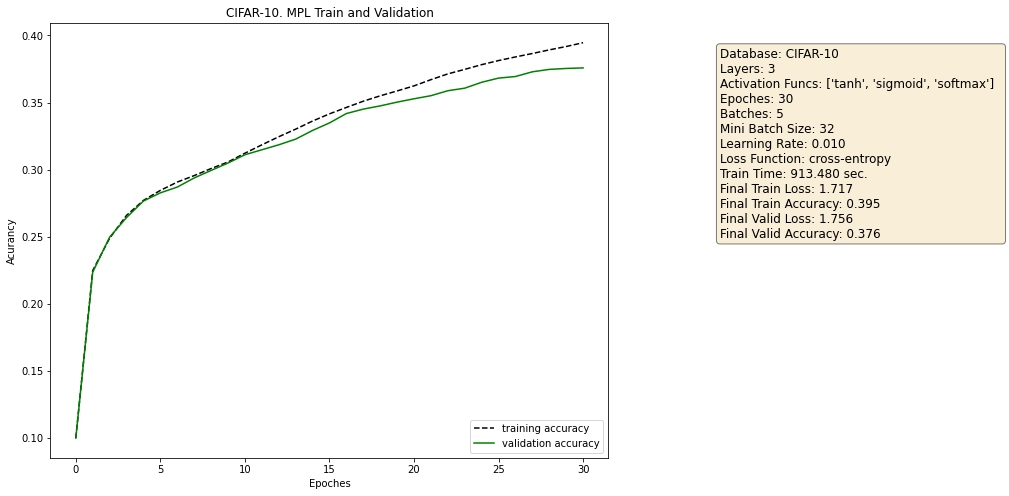

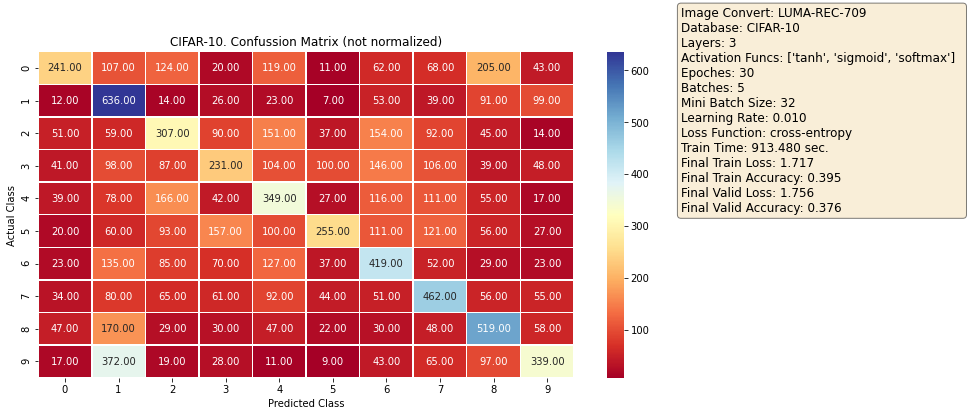

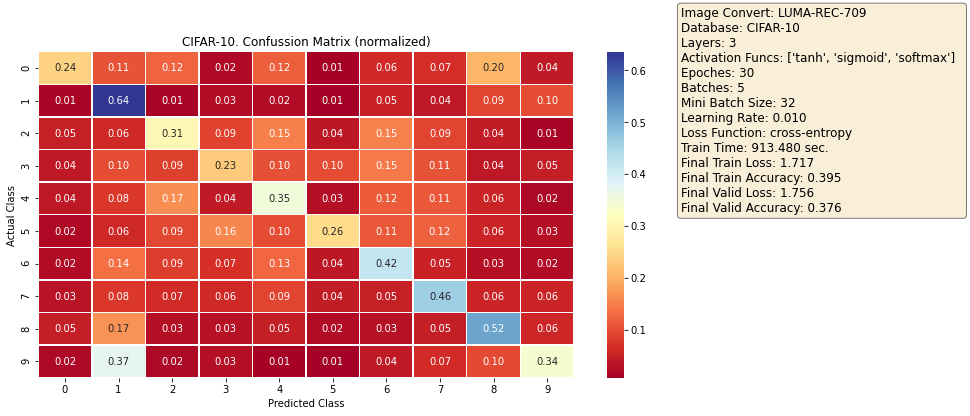

Image Convert: LUMA-REC-709
Database: CIFAR-10  
Layers: 3  
Activation Funcs: ['tanh', 'sigmoid', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 32  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 913.480 sec.  
Final Train Loss: 1.717  
Final Train Accuracy: 0.395  
Final Valid Loss: 1.756  
Final Valid Accuracy: 0.376


In [25]:
layer1 = mlp.NeuralNetworkLayer(1024, 512, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(512, 256, activation_func=mlp.ActivationFunction('sigmoid'))
layer3 = mlp.NeuralNetworkLayer(256, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=32, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='CIFAR-10', img_dir=os.path.join(img_dir, 'LUMA-REC-709'), img_format='_3.png')
description = f'Image Convert: LUMA-REC-709\n{description}'
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'CIFAR-10', os.path.join(img_dir, 'LUMA-REC-709'), '. 3 layers.png', description)
print(description)

In [28]:
# !zip -r /content/img_cifar-10.zip /content/img_cifar-10

  adding: content/img_cifar-10/ (stored 0%)
  adding: content/img_cifar-10/LUMA-REC-709/ (stored 0%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. Confussion Matrix (not normalized). 3 layers.png (deflated 3%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. MPL Train and Validation. 1 layer.png (deflated 7%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. Confussion Matrix (not normalized). 2 layers.png (deflated 3%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. Confussion Matrix (normalized). 3 layers.png (deflated 3%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. Confussion Matrix (normalized). 1 layer.png (deflated 3%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. MPL Train and Validation_3.png (deflated 6%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. Confussion Matrix (normalized). 2 layers.png (deflated 4%)
  adding: content/img_cifar-10/LUMA-REC-709/CIFAR-10. Confussion Matrix (not normalized). 1 layer.png (deflated 3%)
  addi

In [29]:
# from google.colab import files
# files.download("/content/img_cifar-10.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Результаты моделей нейронных сетей с различными параметрами при работе с набором данных **CIFAR-10**

|Color Converting <br> Method|Layers|Activation <br> Functions|Loss Function|Epoches / <br> Batches / <br> Mini Batches Size|Learning <br> Rate|Train <br> Time|Final Train <br> Loss|Final Train <br> Accurancy|Final Valid <br> Loss|Final Valid <br> Accurancy|Best Class / <br> Accurancy|Worst Class / <br> Accurancy|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|AVG RGB|1|softmax|cross-entropy|30/5/32|0.01|34.367 sec.|1.979|0.311|2.023|0.293|1 / 0.60|3 / 0.17 <br> 4 / 0.20 <br> 0, 2 / 0.22|
|AVG RGB|2|tanh/softmax|cross-entropy|30/5/32|0.01|554.990 sec.|1.638|0.417|1.714|0.387|1 / 0.76 <br> 7 / 0.51|3 / 0.16 <br> 5 / 0.26 <br> 9 / 0.29|
|AVG RGB|3|tanh/sigmoid/softmax|cross-entropy|30/5/32|0.01|721.926 sec.|1.709|0.397|1.743|0.382|1 / 0.61 <br> 8 / 0.52|3 / 0.21 <br> 0 / 0.26 <br> 2 / 0.27|
|---|
|LUMA-REC-601|1|softmax|cross-entropy|30/5/32|0.01|34.762 sec.|1.992|0.307|2.040|0.287|1 / 0.60|3 / 0.18 <br> 0 / 0.19 <br> 4 / 0.20|
|LUMA-REC-601|2|tanh/softmax|cross-entropy|30/5/32|0.01|589.086 sec.|1.635|0.420|1.717|0.387|1 / 0.74|3 / 0.16 <br> 5 / 0.28 <br> 9 / 0.28|
|LUMA-REC-601|3|tanh/sigmoid/softmax|cross-entropy|30/5/32|0.01|763.993 sec.|1.721|0.392|1.761|0.376|1 / 0.65 <br> 8 / 0.51|3 / 0.23 <br> 0 / 0.24 <br> 2 / 0.30|
|---|
|LUMA-REC-709|1|softmax|cross-entropy|30/5/32|0.01|34.863 sec.|1.991|0.307|2.038|0.285|1 / 0.60|1 / 0.60|3 / 0.17 <br> 0 / 0.19 <br> 4 / 0.21|
|LUMA-REC-709|2|tanh/softmax|cross-entropy|30/5/32|0.01|577.535 sec.|1.630|0.421|1.714|0.390|1 / 0.75 <br> 7 / 0.5|3 / 0.17 <br> 5 / 0.29 <br> 0, 9 / 0.30|
|LUMA-REC-709|3|tanh/sigmoid/softmax|cross-entropy|30/5/32|0.01|913.480 sec.|1.717|0.395|1.756|0.376|1 / 0.64 <br> 8 / 0.52|3 / 0.23 <br> 0 / 0.24 <br> 5 / 0.26

## Вывод
1. На наборе данных **CIFAR-10** простейшая нейронная сеть на основе персептронов уже не способна распознать изображения с хорошей точностью (< 0.42).
2. При увеличении количества слоев нейронной сети, продолжительность работы возрастает.
3. Наибольшую точность распознавания получили классы изображений: **1, 7, 8**.
4. Наименее точно распознавались изображения из классов: **3, 0, 2, 4, 5**
